# 미니프로젝트
- 필요한 라이브러리 목록
<ol>
    <li>데이터베이스: cx_Oracle</li>
    <li>서버: flask</li>
    <li>분석: numpy, pandas, matplotlib, seaborn</li>
</ol>


## 1.flask 연동하기

### 📌 라이브러리 설치

In [11]:
!pip install pandas

!pip install numpy

!pip install matplotlib

!pip install flask

!pip install cx_Oracle

!pip install webdriver_manager
!pip install wordcloud

!pip install selenium
!pip install -U selenium

### 📌 라이브러리 불러오기

In [16]:
from PIL import Image

import numpy as np

import requests as req

import pandas as pd

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
from matplotlib import rc
rc("font", family = "Malgun Gothic")
sns.set(font='Malgun Gothic', rc={"axes.unicode_minus":False})

from selenium import webdriver as wb
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import time

from bs4 import BeautifulSoup as bs

from webdriver_manager.chrome import ChromeDriverManager

from wordcloud import WordCloud

from tqdm import tqdm as tq

import cx_Oracle

from flask import * 

### 📌 파일 불러오기

In [22]:
# 드라마 데이터
data = pd.read_csv('final2.csv', encoding = 'euc-kr')

# 장르 워드클라우드 파일
with open('총장르.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    
# 배우 워드클라우드 파일
with open('배우.txt', 'r', encoding='utf-8') as f:
    cast = f.read()
    
# 데이터 복사
t_data = data
df = data
dt = data

### 📌 flask 연동하기 

In [ ]:
from flask import Flask, render_template

app = Flask(__name__, static_url_path='/static')

@app.route('/')
def video():
    return render_template('video.html')

@app.route('/index')
def result():
    return render_template('index.html')

if __name__ == "__main__":
    app.run(host='127.0.0.1', port=5000)

## 2. 워드클라우드 이미지 저장

### 📌 장르 워드클라우드

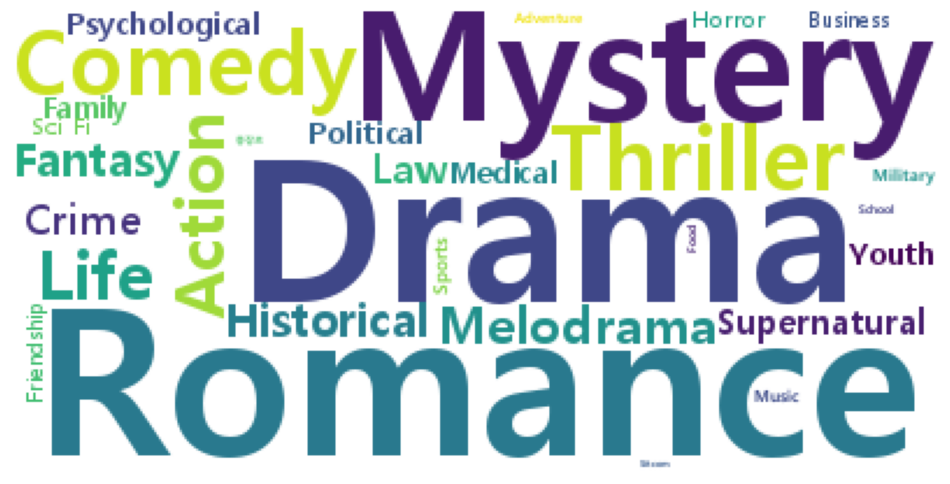

In [19]:
wc = WordCloud(background_color='white', font_path='C:/Windows/Fonts/malgunbd.ttf').generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis('off')
plt.savefig('./static/장르.jpg')

### 📌 배우 워드클라우드

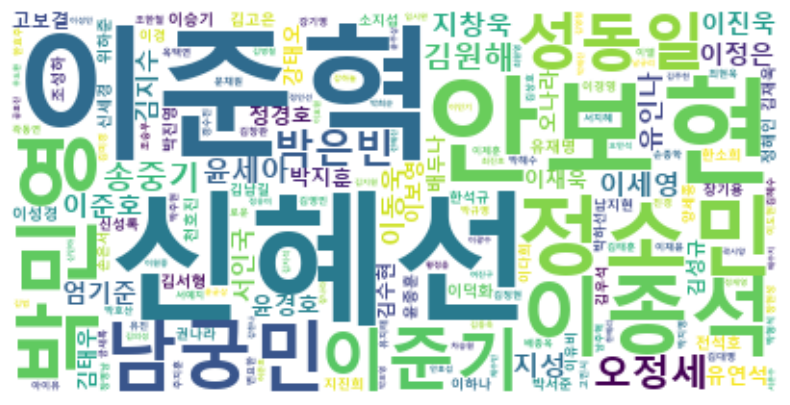

In [24]:
# WordCloud 객체 생성 및 설정
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgunbd.ttf', background_color='white').generate(cast)

# 워드클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# 이미지 저장
plt.savefig('./static/배우.jpg', bbox_inches='tight', pad_inches=0)

## 3. 그래프 이미지 저장 

### 📌장르별 평점 그래프

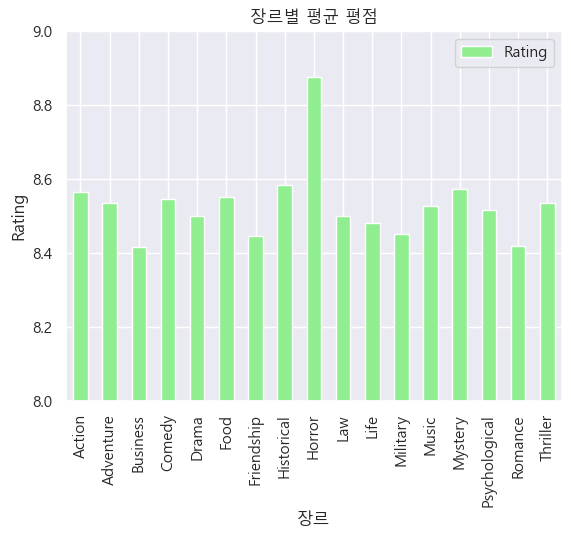

In [5]:
# 장르별 평균 평점
g_mean = t_data.groupby("장르",as_index = False)['Rating'].mean()

g_mean.plot(kind='bar', x= '장르', color='lightgreen')
plt.ylabel('Rating')
plt.xlabel('장르')
plt.title('장르별 평균 평점')
plt.ylim(8, 9)
plt.savefig('./static/장르별평점(평균).jpg', bbox_inches='tight')

### 📌 장르별 시청률 그래프

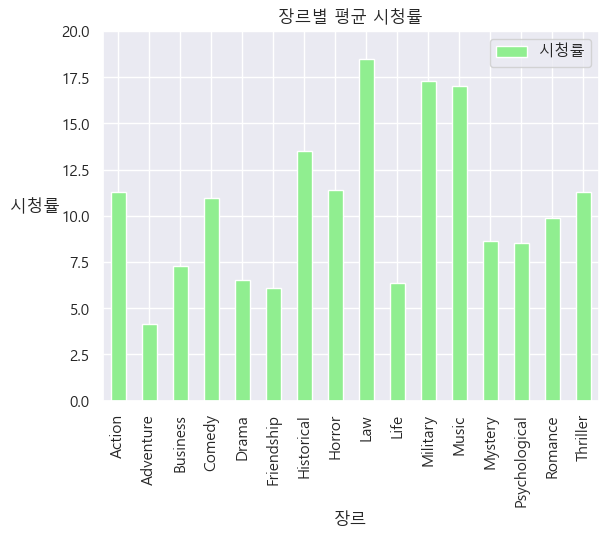

In [35]:
gd = t_data['장르']
gd = pd.DataFrame(gd)

gt = pd.concat([gd, to1], axis = 1)

gt = gt.dropna()

data_g_w = gt.groupby('장르', as_index = False)['시청률'].mean()

data_g_w.plot(kind='bar', x= '장르', color='lightgreen')
plt.ylabel('시청률       ',rotation=0)
plt.xlabel('장르')
plt.title('장르별 평균 시청률')
plt.ylim(0,20)
plt.savefig('./static/장르별시청률(평균).jpg', bbox_inches='tight')

### 📌 요일별 시청률 그래프

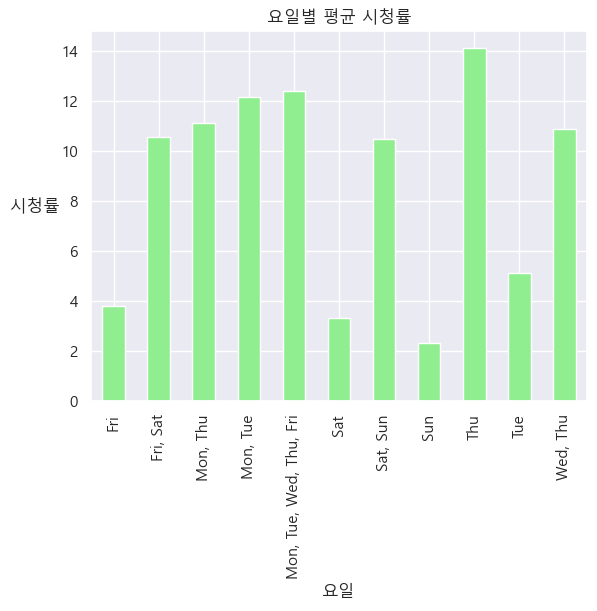

In [28]:
# 요일 데이터 전처리
t_data["Aired On"]=t_data["Aired On"].replace(" Saturday, Sunday","Sat, Sun")
t_data["Aired On"]=t_data["Aired On"].replace(" Monday, Tuesday","Mon, Tue")
t_data["Aired On"]=t_data["Aired On"].replace(" Wednesday, Thursday","Wed, Thu")
t_data["Aired On"]=t_data["Aired On"].replace(" Friday, Saturday","Fri, Sat")
t_data["Aired On"]=t_data["Aired On"].replace(" Sunday, Saturday","Sat, Sun")
t_data["Aired On"]=t_data["Aired On"].replace("Thursday, Wednesday","Wed, Thu")
t_data["Aired On"]=t_data["Aired On"].replace("Friday","Fri")
t_data["Aired On"]=t_data["Aired On"].replace("Saturday, Sunday","Sat, Sun")
t_data["Aired On"]=t_data["Aired On"].replace("Wednesday, Thursday","Wed, Thu")
t_data["Aired On"]=t_data["Aired On"].replace("Friday, Saturday","Fri, Sat")
t_data["Aired On"]=t_data["Aired On"].replace("Monday","Mon")
t_data["Aired On"]=t_data["Aired On"].replace("Tuesday","Tue")
t_data["Aired On"]=t_data["Aired On"].replace("Wednesday","Wed")
t_data["Aired On"]=t_data["Aired On"].replace("Monday, Tuesday","Mon, Thu")
t_data["Aired On"]=t_data["Aired On"].replace("Saturday","Sat")
t_data["Aired On"]=t_data["Aired On"].replace("Sunday","Sun")
t_data["Aired On"]=t_data["Aired On"].replace("Thursday","Thu")
t_data["Aired On"]=t_data["Aired On"].replace("Monday, Thursday","Mon, Thu")
t_data["Aired On"]=t_data["Aired On"].replace("Tuesday, Thursday", 'Tue, Thu')
t_data["Aired On"]=t_data["Aired On"].replace("Monday, Tuesday, Wednesday, Thursday, Friday","Mon, Tue, Wed, Thu, Fri")
t_data["Aired On"]=t_data["Aired On"].replace("Monday, Tuesday, Wednesday","Mon, Tue, Wed")
t_data["Aired On"]=t_data["Aired On"].replace("Wednesday, Saturday", 'Wed, Sat')
t_data["Aired On"].unique()

# 시청률 데이터 전처리
t_data["시청률"] = t_data["시청률"].str.replace("%", "")
t_data['시청률'].astype(float)

# Aired On, 시청률 데이터 프레임 생성, nan 드랍
to = t_data['Aired On']
to1 = t_data['시청률']

to = pd.DataFrame(to)
to1 = pd.DataFrame(to1)
to1 = to1.astype('float')

end = pd.concat([to, to1], axis = 1)

end.dropna(inplace = True)

aired_rate = end.groupby("Aired On")['시청률'].mean()

aired_rate.plot(kind='bar', x= '요일', color='lightgreen')
plt.ylabel('시청률       ', rotation=0)
plt.xlabel('요일')
plt.title('요일별 평균 시청률')
plt.savefig('./static/요일별시청률(평균).jpg',bbox_inches='tight')
plt.show()

### 📌 회차별 시청률

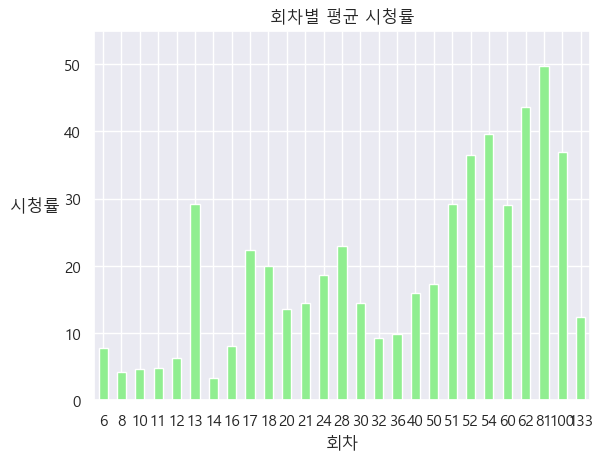

In [9]:
# 시청률, 회차수 데이터 프레임 생성, nan 드랍
h = pd.DataFrame(t_data['Number of Episodes'])
h1 = pd.DataFrame(t_data['시청률'])

h1 = h1.astype('float')

end2 = pd.concat([h, h1], axis = 1)

end2.dropna(inplace = True)

ep_rate = end2.groupby("Number of Episodes")['시청률'].mean()

ep_rate.plot(kind='bar', x= '회차', color='lightgreen')

plt.ylabel('시청률        ', rotation=0)
plt.xlabel('회차')
plt.title('회차별 평균 시청률')
plt.xticks(rotation=0)
plt.ylim(0,55)
plt.savefig('./static/회차별시청률(평균).jpg',bbox_inches='tight')

### 📌 방영사별 시청률

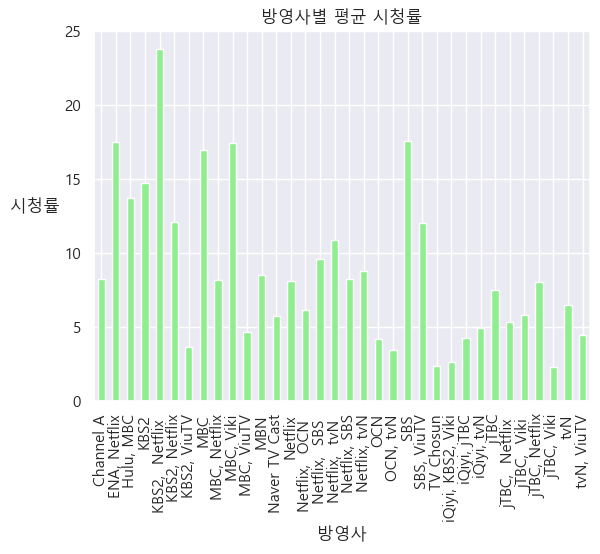

In [10]:
# Original Network, 시청률 데이터프레임 생성, nan 드랍
on = t_data["Original Network"] 
on2 = t_data['시청률']

on2 = on2.astype('float')

end4 = pd.concat([on, on2], axis = 1)

end4.dropna(inplace = True)

ott_rate = end4.groupby("Original Network")['시청률'].mean()

ott_rate.plot(kind='bar', x= '방영사', color='lightgreen')

plt.ylabel('시청률        ', rotation=0)
plt.xlabel('방영사')
plt.title('방영사별 평균 시청률')

plt.ylim(0,25)
plt.savefig('./static/방영사별시청률(평균).jpg',bbox_inches='tight')

### 📌 방영사 Top 5 시청률

C:\Users\smhrd\AppData\Local\Temp\ipykernel_2636\2566111770.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  on4 = end4[(on == 'tvN') | (on == 'SBS') | (on == 'MBC') | (on == 'KBS2') | (on == 'OCN') ]
C:\Users\smhrd\AppData\Local\Temp\ipykernel_2636\2566111770.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  on4['시청률'] = on4['시청률'].astype(float)


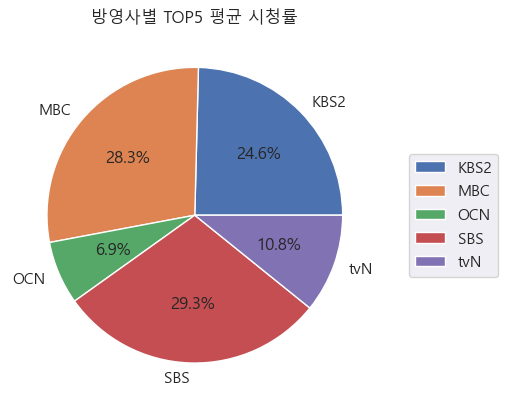

In [34]:
# 방영수 top5 방영사 Original Network, 시청률 데이터프레임 생성, nan 드랍
on4 = end4[(on == 'tvN') | (on == 'SBS') | (on == 'MBC') | (on == 'KBS2') | (on == 'OCN') ]

# 방영수 top5 방영사 Original Network, 시청률 데이터프레임 생성, nan 드랍
on4['시청률'] = on4['시청률'].astype(float)

# on4 DataFrame이나 ot5_rate DataFrame을 복사하여 경고를 방지할 수 있습니다.
ot5_rate = on4.groupby("Original Network")['시청률'].mean().copy()

# 그래프를 그립니다.
labels = ot5_rate.index
plt.title("방영사별 TOP5 평균 시청률")
plt.pie(ot5_rate, labels=labels, autopct='%.1f%%')
plt.legend(loc="center", bbox_to_anchor=(1.2, 0.5))

# 그래프를 이미지 파일로 저장합니다.
plt.savefig('./static/방영사별TOP5시청률(평균).jpg', bbox_inches='tight')

# 그래프를 화면에 표시합니다.
plt.show()

### 📌 방영 요일별 회차수

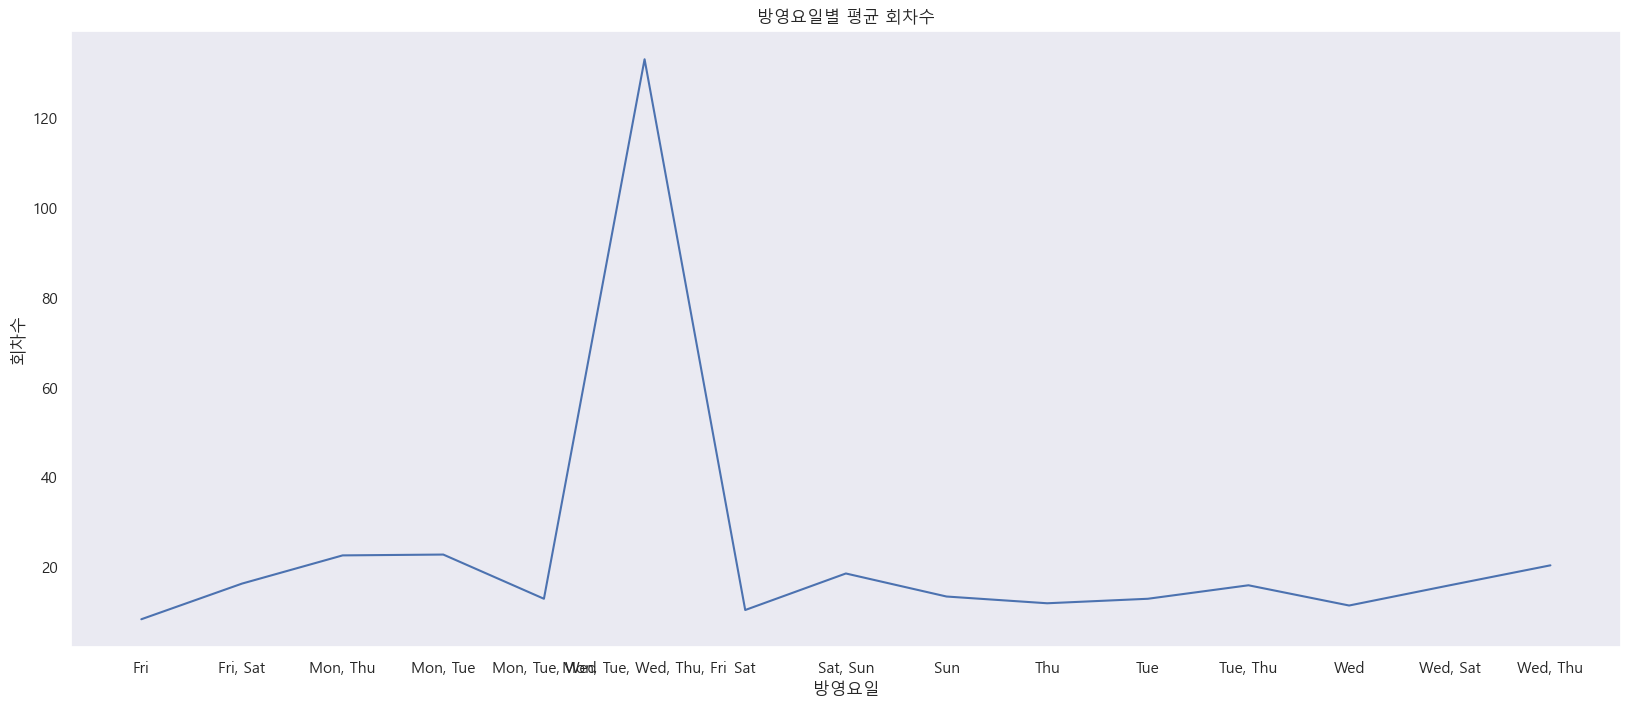

In [36]:
# Number of Episodes, Aired on 데이터프레임 생성
k = pd.DataFrame(t_data['Number of Episodes'])
k1 = pd.DataFrame(t_data['Aired On'])

end3 = pd.concat([k, k1], axis = 1)

ep_aired = end3.groupby("Aired On")['Number of Episodes'].mean()

plt.figure(figsize = (20, 8))
plt.plot(ep_aired.index, ep_aired)
plt.title('방영요일별 평균 회차수')

plt.grid()
plt.xlabel('방영요일')
plt.ylabel('회차수')
plt.savefig('./static/방영요일별회차수(평균).jpg',bbox_inches='tight')

### 📌 랭킹별 평점

C:\Users\smhrd\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x800 with 0 Axes>

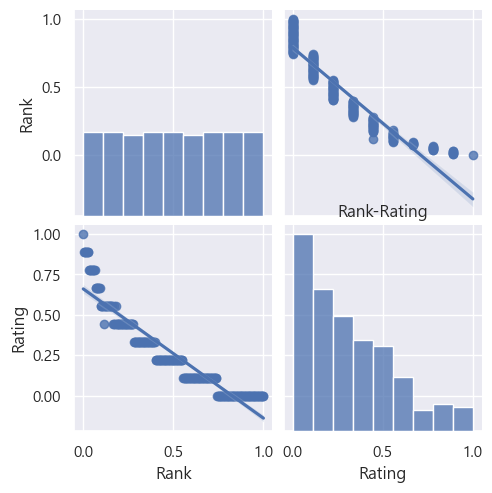

In [291]:
# Rank 데이터 전처리
df['Rank'] = t_data['Rank'].str.replace('#', "").astype(np.int64)

mm = MinMaxScaler()

pre_df_rr = df[['Rank', 'Rating']]
mm.fit(pre_df_rr)
df1 = pd.DataFrame(mm.transform(pre_df_rr), columns=pre_df_rr.columns)
df1.describe().T

X = df1['Rank']
Y = df1['Rating']
plt.figure(figsize = (20, 8))
sns.pairplot(df1, kind='reg')
plt.title('Rank-Rating')

plt.savefig('./static/랭킹별평점.jpg', bbox_inches='tight')
plt.show()

### 📌 랭킹별 조회수

C:\Users\smhrd\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


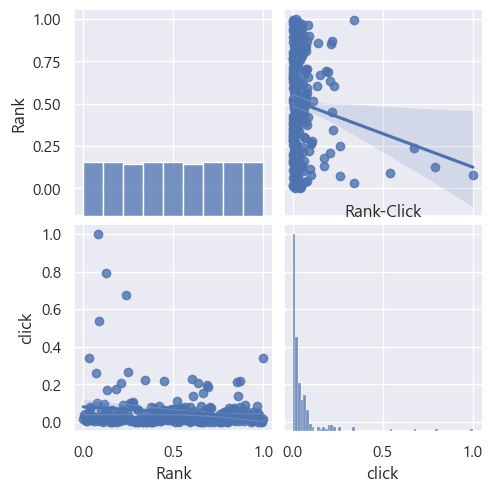

In [232]:
pre_df_rc = df[['Rank', 'click']]
mm.fit(pre_df_rc)
df2 = pd.DataFrame(mm.transform(pre_df_rc), columns=pre_df_rc.columns)

df2.describe().T

X = df2['Rank']
Y = df2['click']


sns.pairplot(df2, kind='reg')
plt.title('Rank-Click')
plt.savefig('./static/랭킹별조회수.jpg',bbox_inches='tight')

### 📌 랭킹별 시청률

C:\Users\smhrd\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


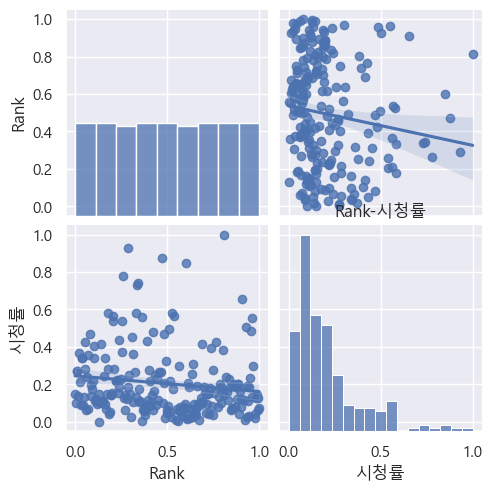

In [233]:
pre_df_ra=df[['Rank', '시청률']]
mm.fit(pre_df_ra)
df3 = pd.DataFrame(mm.transform(pre_df_ra), columns=pre_df_ra.columns)

X = df3['Rank']
Y = df3['시청률']

sns.pairplot(df3, kind='reg')
plt.title('Rank-시청률')
plt.savefig('./static/랭킹별시청률.jpg',bbox_inches='tight')

### 📌 평점별 조회수

C:\Users\smhrd\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


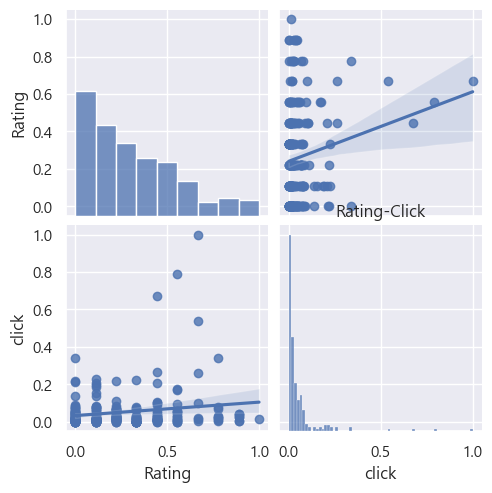

In [237]:
pre_df4 = df[['Rating', 'click']]
mm.fit(pre_df4)
df4 = pd.DataFrame(mm.transform(pre_df4), columns=pre_df4.columns)

X = df4['Rating']
Y = df4['click']

sns.pairplot(df4, kind='reg')
plt.title('Rating-Click')
plt.savefig('./static/평점별조회수.jpg',bbox_inches='tight')

### 📌 평점별 시청률

C:\Users\smhrd\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


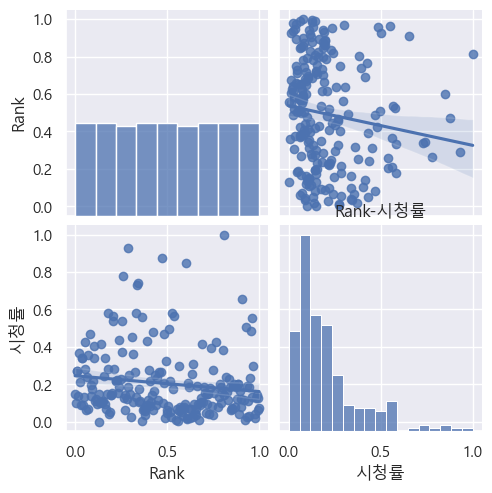

In [238]:
pre_df5 = df[['Rank', '시청률']]
mm.fit(pre_df5)
df5 = pd.DataFrame(mm.transform(pre_df5), columns=pre_df5.columns)

X = df5['Rank']
Y = df5['시청률']

sns.pairplot(df5, kind='reg')
plt.title('Rank-시청률')
plt.savefig('./static/평점별시청률.jpg',bbox_inches='tight')

### 📌 조회수별 시청률

C:\Users\smhrd\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


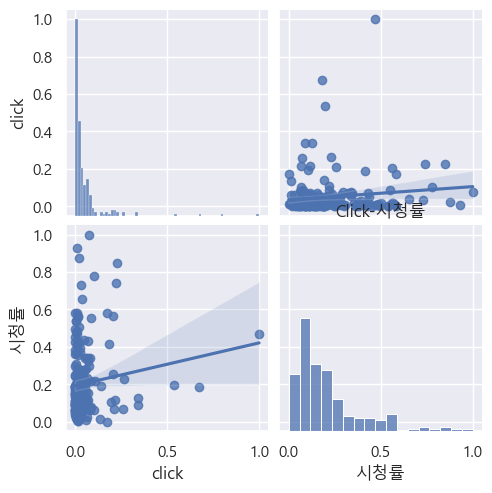

In [240]:
pre_df6 = df[['click', '시청률']]
mm.fit(pre_df6)
df6 = pd.DataFrame(mm.transform(pre_df6), columns=pre_df6.columns)

X = df6['click']
Y = df6['시청률']

sns.pairplot(df6, kind='reg')
plt.title('Click-시청률')
plt.savefig('./static/조회수별시청률.jpg',bbox_inches='tight')

### 📌 상관관계 히트맵

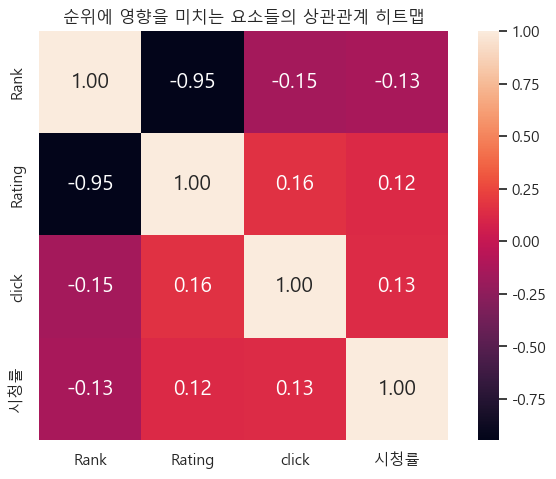

In [241]:
cols = ['Rank', 'Rating', 'click', '시청률']
corr = df[cols].corr(method='pearson')

column_names = ['Rank', 'Rating', 'click', '시청률']

plt.rc('font', family='NanumBarunGothic')
sns.set(style='whitegrid')

sns.set(font='Malgun Gothic', rc={"axes.unicode_minus":False})

hm = sns.heatmap(corr.values, # 상관계수 데이터
            cbar=True, # 오른쪽 컬러 막대 출력 여부
            annot=True, # 차트에 숫자를 보여줄 것인지 여부
            square=True, # 차트를 정사각형으로 할 것인지
            fmt='.2f', # 숫자의 출력 소수점자리 개수 조절
            annot_kws={'size': 15}, # 숫자 출력시 숫자 크기 조절
            yticklabels=column_names, # y축에 컬럼명 출력
            xticklabels=column_names) # x축에 컬럼명 출력

plt.tight_layout() # 그래프 간격 유지 설정
plt.title('순위에 영향을 미치는 요소들의 상관관계 히트맵')
plt.savefig('./static/상관관계히트맵.jpg',bbox_inches='tight')

### 📌 Scatter Plot(Rank-click)

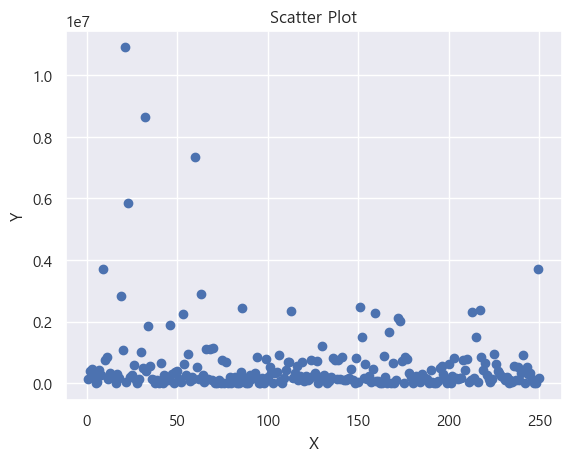

In [295]:
dt['Rank'] = dt['Rank'].str.replace('#', "").astype(np.int64)

s1 = dt['Rank']
s2 = dt['click']

plt.scatter(s1, s2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.grid(True)
plt.savefig('./static/Scatter Plot(Rank-click).jpg',bbox_inches='tight')

### 📌 Scatter Plot(Rank-Rating)

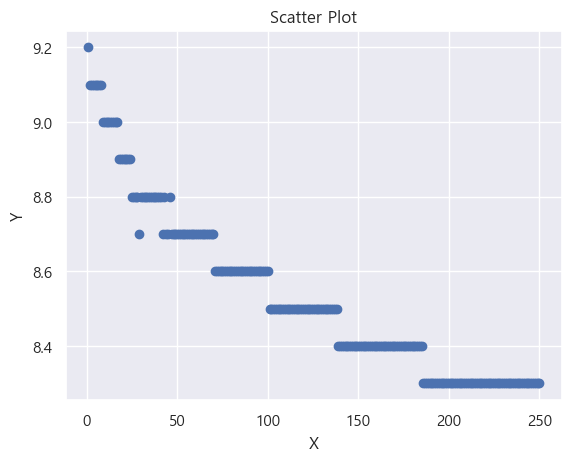

In [296]:
dt = data

s1 = dt['Rank']
s2 = dt['Rating']

plt.scatter(s1, s2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.grid(True)
plt.savefig('./static/Scatter Plot(Rank-Rating).jpg',bbox_inches='tight')

### 📌 Polynomial Regression(Rank-Rating)

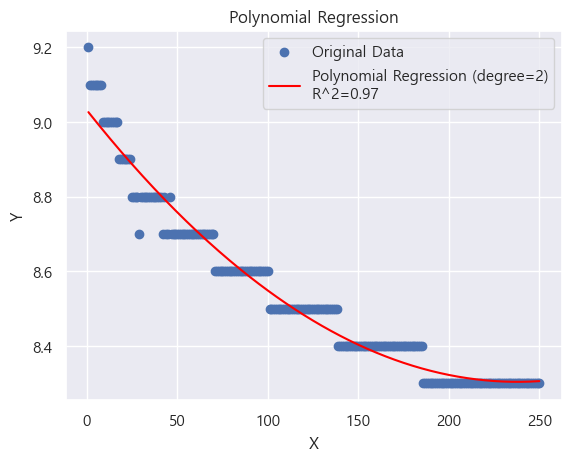

R-squared: 0.9671129236275942


In [304]:
# 샘플 시리즈 데이터
s1 = df['Rank']
s2 = df['Rating']

# 다항식 특성 추가
X = s1.values.reshape(-1, 1)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# 다항 회귀 모델 피팅
model = LinearRegression()
model.fit(X_poly, s2)

# 예측값 계산
y_pred = model.predict(X_poly)

# 결정 계수(R-squared) 계산
r_squared = r2_score(s2, y_pred)

# 시각화
plt.scatter(s1, s2, label='Original Data')
plt.plot(s1, y_pred, color='red', label=f'Polynomial Regression (degree=2)\nR^2={r_squared:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)

plt.savefig('./static/Polynomial Regression(Rank-Rating).jpg',bbox_inches='tight')
plt.show()

# 결정 계수 출력
print("R-squared:", r_squared)

### 📌 Polynomial Regression(Rank-click)

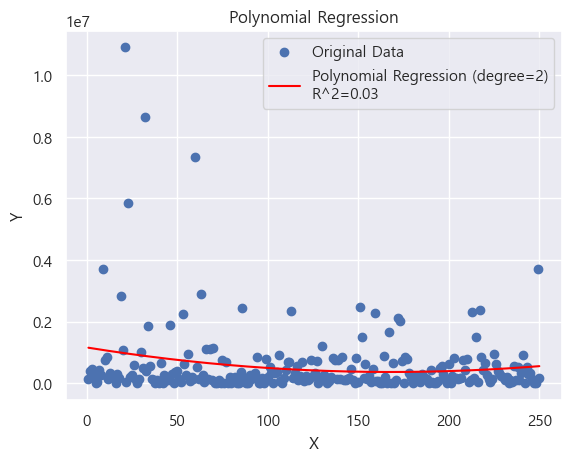

R-squared: 0.034204069396924996


In [303]:
df = data

# 샘플 시리즈 데이터
s1 = df['Rank']
s2 = df['click']

# 다항식 특성 추가
X = s1.values.reshape(-1, 1)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# 다항 회귀 모델 피팅
model = LinearRegression()
model.fit(X_poly, s2)

# 예측값 계산
y_pred = model.predict(X_poly)

# 결정 계수(R-squared) 계산
r_squared = r2_score(s2, y_pred)

# 시각화
plt.scatter(s1, s2, label='Original Data')
plt.plot(s1, y_pred, color='red', label=f'Polynomial Regression (degree=2)\nR^2={r_squared:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)

plt.savefig('./static/Polynomial Regression(Rank-click).jpg',bbox_inches='tight')
plt.show()

# 결정 계수 출력
print("R-squared:", r_squared)

### 📌 Linear vs ploynomial(시청률)

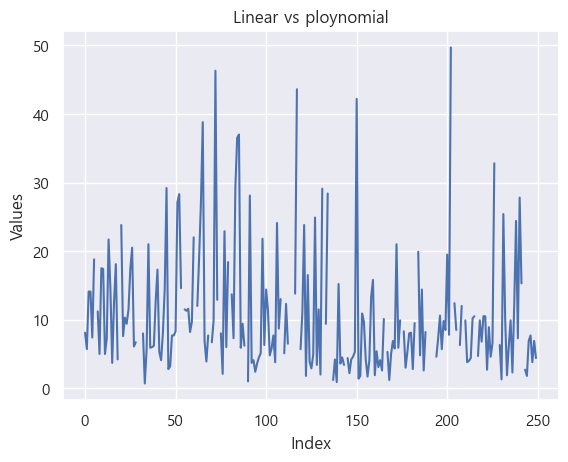

In [302]:
df = data

b = df['시청률']=df['시청률'].str.replace("%", "").astype(np.float64)

plt.plot(b.index, b.values)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Linear vs ploynomial')
plt.grid(True)

plt.savefig('./static/Linear vs ploynomial(시청률).jpg',bbox_inches='tight')
plt.show()

### 📌 드라마 OST 조회수 데이터 증강

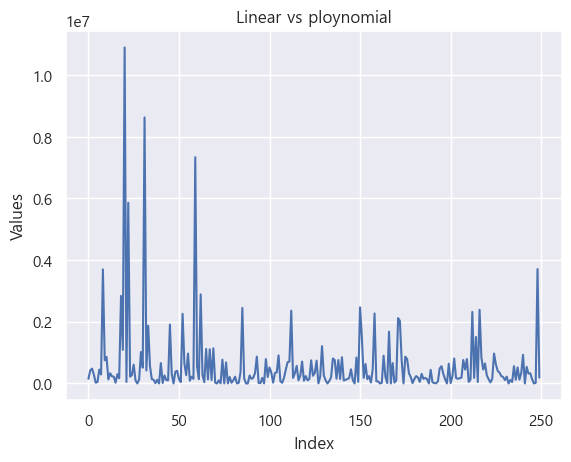

In [305]:
df = data

o = df['click']

o_p = o.interpolate(method='polynomial', order=2)

a=o_p

plt.plot(a.index, a.values)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Linear vs ploynomial')
plt.grid(True)

plt.savefig('./static/Linear vs ploynomial(드라마OST조회수).jpg',bbox_inches='tight')
plt.show()